# Day 08. Exercise 05
# Clustering

## 0. Imports

In [56]:
import pandas as pd
import sklearn
import sqlite3
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.compose import ColumnTransformer

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [45]:
df = pd.read_csv("../data/regression.csv")
df.drop(['pageviews'], axis=1, inplace=True)
X = df[['num_commits','AVG(diff)']].values
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

n_clusters: 3 silhouette avg: 0.43901709571532954


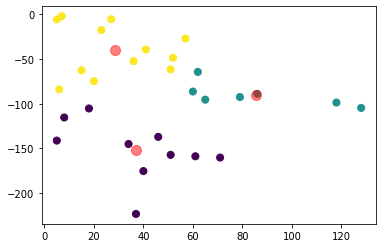

In [46]:
kmeans = KMeans(random_state=21, n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
silhouette_avg = silhouette_score(X, y_kmeans)
print("n_clusters:", 3, "silhouette avg:", silhouette_avg)

n_clusters: 3 silhouette avg: 0.44641001650786977


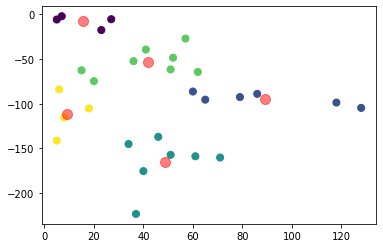

In [47]:
kmeans = KMeans(random_state=21, n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);
silhouette_avg = silhouette_score(X, y_kmeans)
print("n_clusters:", 3, "silhouette avg:", silhouette_avg)

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

min_samples: 2 silhouette avg: 0.38339641455696616


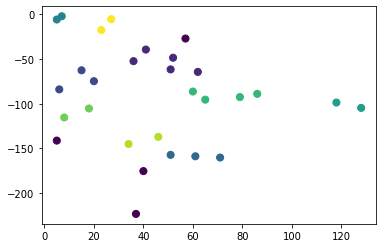

In [53]:
dbscan = DBSCAN(eps=20, min_samples=2)
# dbscan.fit(X)
y_dbscan = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
silhouette_avg = silhouette_score(X, y_dbscan)
print("min_samples:", 2, "silhouette avg:", silhouette_avg)

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

n_clusters: 5 silhouette avg: 0.46383015199381467


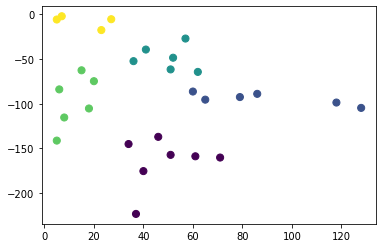

In [64]:
model = AgglomerativeClustering(      =5)
y = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
silhouette_avg = silhouette_score(X, y)
print("n_clusters:", 5, "silhouette avg:", silhouette_avg)

n_clusters: 10 silhouette avg: 0.431193930539333


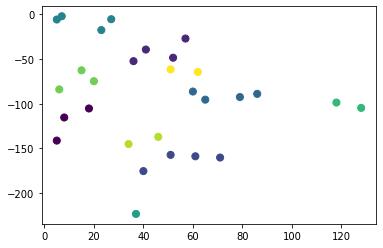

In [67]:
model = AgglomerativeClustering(n_clusters=10)
y = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
silhouette_avg = silhouette_score(X, y)
print("n_clusters:", 10, "silhouette avg:", silhouette_avg)

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [222]:
def my_best_function(model_class, params, name, the_range, X):
    if  type(params) != dict or type(the_range) != list:
        print("Wrong arguments!")
        return
    all_scores = []
    best_score = 1
    silhouette_avg = 0
    best_param = the_range[0]
    best_model = model_class(params)
    for x in the_range:
        params[name] = x
        model = model_class(**params)
        model.fit(X)
        y = model.fit_predict(X)
        if len(np.unique(model.labels_)) > 1:
            silhouette_avg = silhouette_score(X, y)
        all_scores += [silhouette_avg]
        if abs(best_score) > abs(silhouette_avg):
            best_model = model
            best_score = silhouette_avg
            best_param = x
    params[name] = best_param
    best_model = model_class(**params)

    y = model.fit_predict(X)

    #print
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(all_scores, the_range)
    ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    fig.set_figheight(8)
    fig.set_figwidth(17)
    ax1.title.set_text('score')
    ax2.title.set_text('model')
            
        

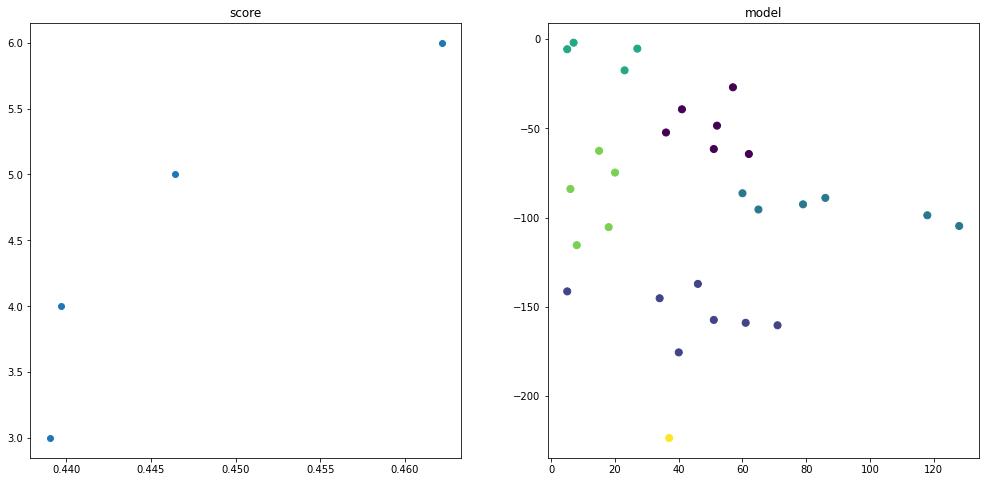

In [225]:
my_best_function(KMeans,{"random_state":21, "n_clusters": 3} ,"n_clusters", [3, 4, 5, 6], X)

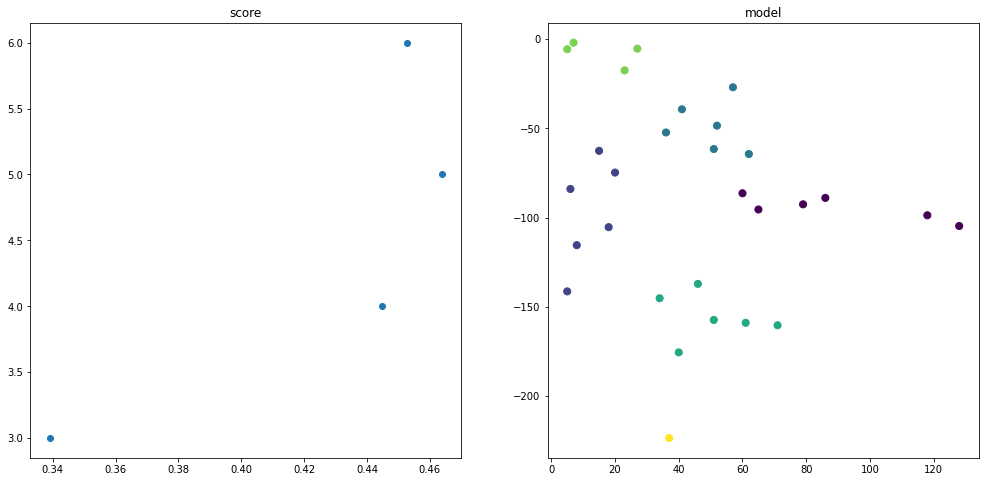

In [224]:
my_best_function(AgglomerativeClustering,{"n_clusters": 3} ,"n_clusters", [3, 4, 5, 6], X)

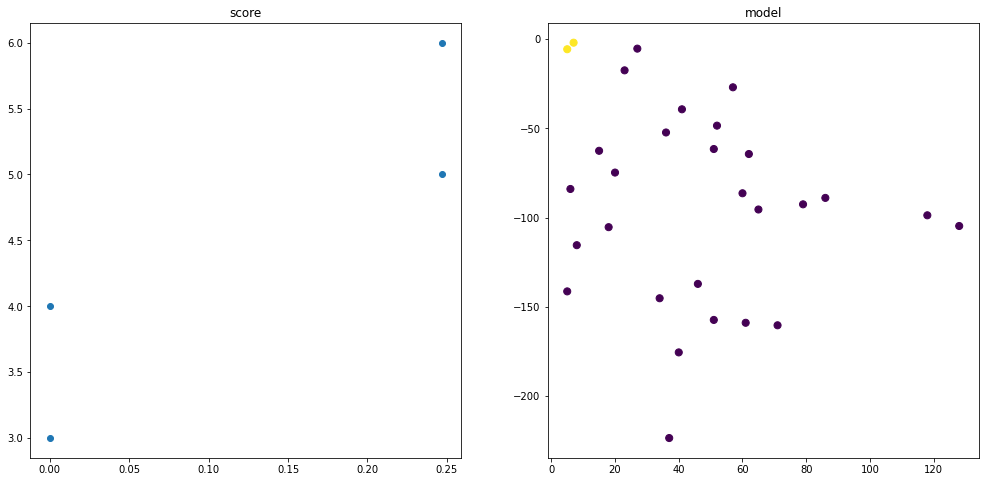

In [223]:
my_best_function(DBSCAN,{"eps":20, "min_samples":2} ,"eps", [3, 4, 5, 6], X)